In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
df_feat = pd.read_csv('../encoded data/opamps-features.csv')
df_ref = pd.read_csv('../encoded data/opamps-xref.csv')

In [3]:
df_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004970 entries, 0 to 1004969
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   STMicro MPN           1004970 non-null  object
 1   STMicro Name          1004970 non-null  object
 2   Competitor MPN        1004970 non-null  object
 3   Competitor Name       1004970 non-null  object
 4   Cross Reference Type  1004970 non-null  object
dtypes: object(5)
memory usage: 38.3+ MB


In [4]:
df_feat.head()

,MPN,MANUFACTURER,Maximum Input Offset Voltage,Maximum Single Supply Voltage,Minimum Single Supply Voltage,Number of Channels per Chip,Supplier_Package,Typical Gain Bandwidth Product
0,PN-100,MN-103,0.000200,36.0,2.0,4.0,CDIP,4.814442e+07
1,PN-101,MN-103,0.000200,36.0,2.0,4.0,CFPAK,4.814442e+07
2,PN-102,MN-1036,0.000036,5.0,2.7,2.0,CSOIC,3.000000e+06
3,PN-103,MN-1036,0.004000,5.0,2.7,1.0,CFPAK,1.000000e+09
4,PN-104,MN-1036,0.005000,32.0,3.0,4.0,CDIP,1.200000e+06


In [5]:
categorical_columns = ["Supplier_Package"]

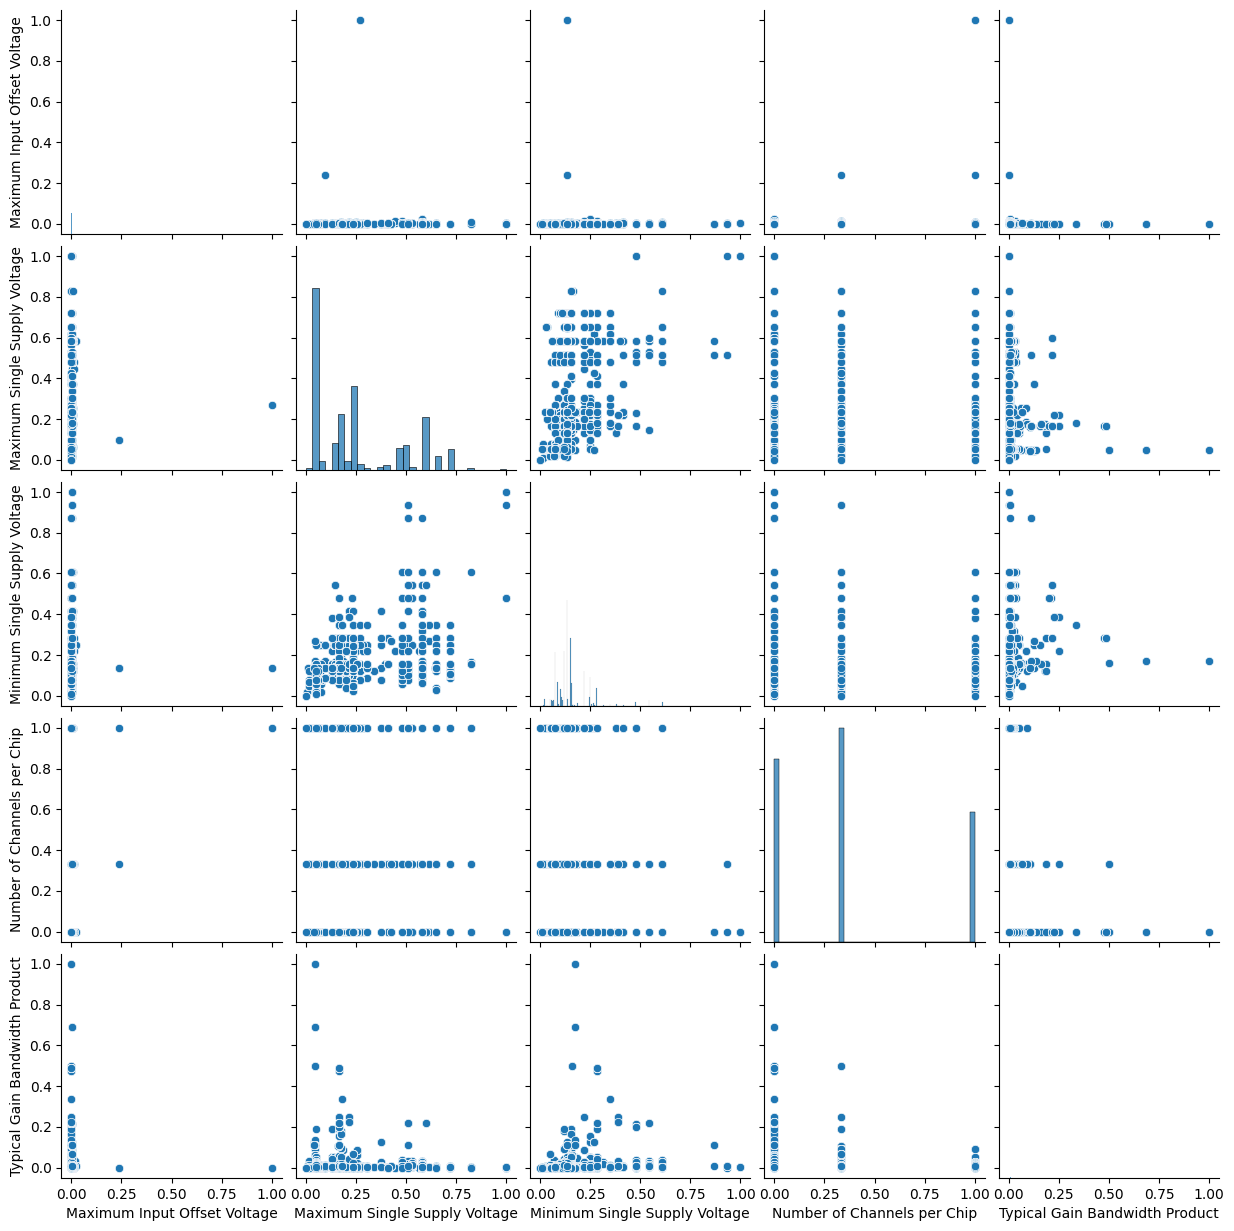

In [6]:
numerical_columns = ["Maximum Input Offset Voltage","Maximum Single Supply Voltage","Minimum Single Supply Voltage","Number of Channels per Chip","Typical Gain Bandwidth Product"]
scaler = MinMaxScaler()
df_feat[numerical_columns] = scaler.fit_transform(df_feat[numerical_columns] )
sns.pairplot(df_feat[numerical_columns])
plt.show()

In [7]:
df_stm = df_ref.merge(df_feat , left_on=["STMicro MPN","STMicro Name"], right_on=["MPN",	"MANUFACTURER"	])
df_merged = df_stm.merge(df_feat , left_on=["Competitor MPN","Competitor Name"], right_on=["MPN",	"MANUFACTURER"	], suffixes = ("","_comp") )
df_merged.drop(columns=["STMicro MPN","STMicro Name", "Competitor MPN","Competitor Name"],inplace = True)
df_merged.head()

,Cross Reference Type,MPN,MANUFACTURER,Maximum Input Offset Voltage,Maximum Single Supply Voltage,Minimum Single Supply Voltage,Number of Channels per Chip,Supplier_Package,Typical Gain Bandwidth Product,MPN_comp,MANUFACTURER_comp,Maximum Input Offset Voltage_comp,Maximum Single Supply Voltage_comp,Minimum Single Supply Voltage_comp,Number of Channels per Chip_comp,Supplier_Package_comp,Typical Gain Bandwidth Product_comp
0,A,PN-1017594,MN-1030,0.0005,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017599,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001
1,A,PN-1017602,MN-1030,0.0010,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017598,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001
2,A,PN-1017602,MN-1030,0.0010,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017597,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001
3,A,PN-1017594,MN-1030,0.0005,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017598,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001
4,A,PN-1017602,MN-1030,0.0010,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017599,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001


In [8]:
df_merged["Cross Reference Type"] = df_merged["Cross Reference Type"].replace("B/Downgrade","B")
df_merged["Cross Reference Type"] = df_merged["Cross Reference Type"].replace("B/Upgrade","B")
df_merged["Cross Reference Type"] = df_merged["Cross Reference Type"].replace("C/Downgrade","C")
df_merged["Cross Reference Type"] = df_merged["Cross Reference Type"].replace("C/Upgrade","C")

In [9]:
df_merged["Cross Reference Type"].value_counts()
df_filtered = df_merged[~df_merged["Cross Reference Type"].isin(["SF"])] # à rectifier avec l'equipe de données
df_filtered["Cross Reference Type"].value_counts()

Cross Reference Type
D    808455
C    159451
B     36926
A         8
Name: count, dtype: int64

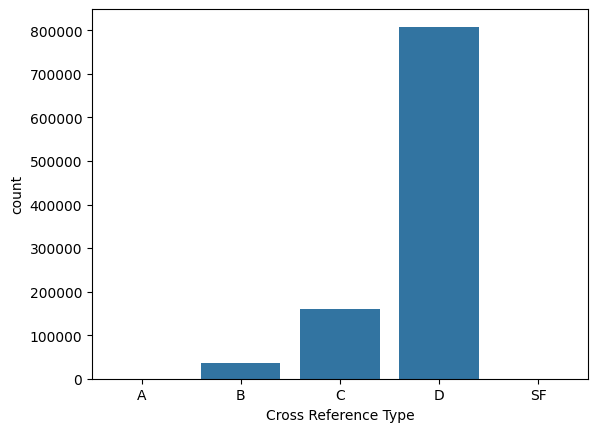

In [10]:
sns.countplot(df_merged, x="Cross Reference Type")
plt.show()

In [11]:
class_A = df_filtered[df_filtered["Cross Reference Type"] == "A"]
class_B = df_filtered[df_filtered["Cross Reference Type"].isin(["B"])]
class_C = df_filtered[df_filtered["Cross Reference Type"].isin(["C"])]
class_D = df_filtered[df_filtered["Cross Reference Type"].isin(["D"])]
n= 36926
random_state = 42

In [12]:
class_B_downsampled = class_B.sample(n=n, random_state=random_state)
class_C_downsampled = class_C.sample(n=n,random_state=random_state)
class_A_oversampled = class_A.sample(n=n,random_state=random_state, replace= True)
class_D_downsampled = class_D.sample(n=n,random_state=random_state)

In [13]:
df_sampled = pd.concat([class_A_oversampled, class_B_downsampled, class_C_downsampled,class_D_downsampled],axis=  0)

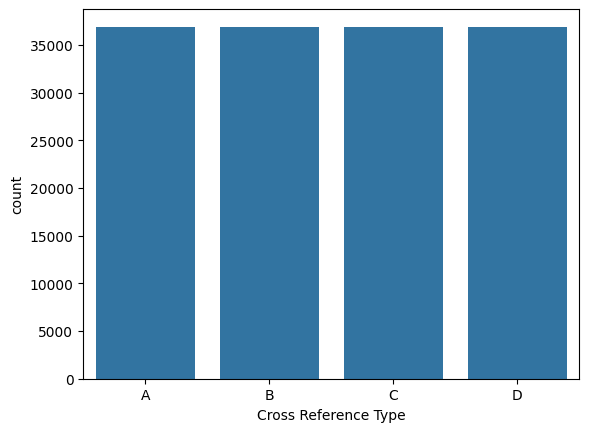

In [14]:
sns.countplot(df_sampled, x="Cross Reference Type")
plt.show()

In [15]:

from scipy.stats import norm
base_means = {
    'A': 0.96,
    'B': 0.84,
    'C': 0.71,
    'D':0.59 # 0.55, 0.65
}
base_std={
    'A': 0.0107,
    'B': 0.0249,
    'C': 0.01779,
    'D': 0.01779
}
interval= {
    "A":(0.93,1),
    "B": (0.77,0.92),
    "C":(0.66,0.76),
    "D":(0.55,0.65)
}
def get_params(category):
    parts = category.split('/')
    
    mean = base_means.get(parts[0], 0.0)
    std = base_std.get(parts[0], 0.0)
    return mean, std
df_sampled["Mean"] , df_sampled["Std"] = zip(*df_sampled["Cross Reference Type"].map(get_params))
df_sampled['Closeness'] = df_sampled.apply(lambda row: norm.rvs(loc=row['Mean'], scale=row['Std']), axis=1)
df_sampled['Closeness'] = df_sampled['Closeness'].clip(0, 1)
for classe in interval:
    df_sampled.loc[df_sampled["Cross Reference Type"]==classe, "Closeness"] = df_sampled.loc[df_sampled["Cross Reference Type"]==classe, "Closeness"].clip(*interval[classe])


<Axes: xlabel='Closeness', ylabel='Density'>

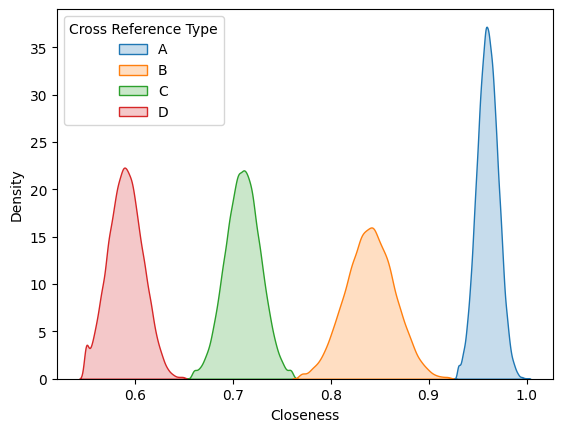

In [16]:
sns.kdeplot(data=df_sampled, x='Closeness', hue='Cross Reference Type', fill=True, common_norm=False)


In [17]:
df_sampled.head()

,Cross Reference Type,MPN,MANUFACTURER,Maximum Input Offset Voltage,Maximum Single Supply Voltage,Minimum Single Supply Voltage,Number of Channels per Chip,Supplier_Package,Typical Gain Bandwidth Product,MPN_comp,MANUFACTURER_comp,Maximum Input Offset Voltage_comp,Maximum Single Supply Voltage_comp,Minimum Single Supply Voltage_comp,Number of Channels per Chip_comp,Supplier_Package_comp,Typical Gain Bandwidth Product_comp,Mean,Std,Closeness
6,A,PN-1017602,MN-1030,0.0010,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017600,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001,0.96,0.0107,0.954136
3,A,PN-1017594,MN-1030,0.0005,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017598,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001,0.96,0.0107,0.945010
4,A,PN-1017602,MN-1030,0.0010,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017599,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001,0.96,0.0107,0.954479
6,A,PN-1017602,MN-1030,0.0010,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017600,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001,0.96,0.0107,0.951815
2,A,PN-1017602,MN-1030,0.0010,0.478261,0.153094,0.0,SOT-23,0.0001,PN-1017597,MN-1036,0.001,0.478261,0.153094,0.0,SOT-23,0.0001,0.96,0.0107,0.959037


In [18]:
for col in numerical_columns: 
    name = col+"_diff"
    df_sampled[name] = np.abs(df_sampled[col]-df_sampled[col+"_comp"])
categorical_columns = ["Supplier_Package"]
for col in categorical_columns: 
    name = col+"_diff"
    df_sampled[name] = np.where(df_sampled[col] == df_sampled[col+"_comp"], 1, 0)#amb
df_sampled.iloc[50000:50005]

,Cross Reference Type,MPN,MANUFACTURER,Maximum Input Offset Voltage,Maximum Single Supply Voltage,Minimum Single Supply Voltage,Number of Channels per Chip,Supplier_Package,Typical Gain Bandwidth Product,MPN_comp,...,Typical Gain Bandwidth Product_comp,Mean,Std,Closeness,Maximum Input Offset Voltage_diff,Maximum Single Supply Voltage_diff,Minimum Single Supply Voltage_diff,Number of Channels per Chip_diff,Typical Gain Bandwidth Product_diff,Supplier_Package_diff
26075,B,PN-1018013,MN-1030,0.001125,0.052174,0.120521,0.000000,SOT-23,0.001000,PN-1017115,...,0.000637,0.84,0.0249,0.860507,0.00050,0.008696,0.000000,0.0,0.000363,1
7377,B,PN-1017855,MN-1030,0.000150,0.052174,0.133550,1.000000,TSSOP,0.000144,PN-104608,...,0.000250,0.84,0.0249,0.857376,0.00085,0.000000,0.000000,0.0,0.000106,0
6711,B,PN-1017971,MN-1030,0.000050,0.052174,0.100977,0.333333,SO,0.006250,PN-1013189,...,0.005500,0.84,0.0249,0.809555,0.00195,0.000000,0.032573,0.0,0.000750,0
5555,B,PN-103347,MN-1030,0.001750,0.478261,0.153094,1.000000,SOIC,0.000162,PN-103329,...,0.000150,0.84,0.0249,0.844383,0.00000,0.069565,0.000000,0.0,0.000013,1
11904,B,PN-1017837,MN-1030,0.000250,0.060870,0.120521,0.333333,SO N,0.000175,PN-1010627,...,0.000250,0.84,0.0249,0.796913,0.00050,0.000000,0.032573,0.0,0.000075,0


In [19]:
df_sampled.to_csv('df_sampled.csv', index=False)

In [102]:
columns_diff = [col+"_diff" for col in numerical_columns+categorical_columns]
for col in columns_diff:
    sns.scatterplot(df_sampled[columns_diff+["Closeness","Cross Reference Type"]*100],x=col, y="Closeness", hue="Cross Reference Type")
    plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (147704, 100) instead

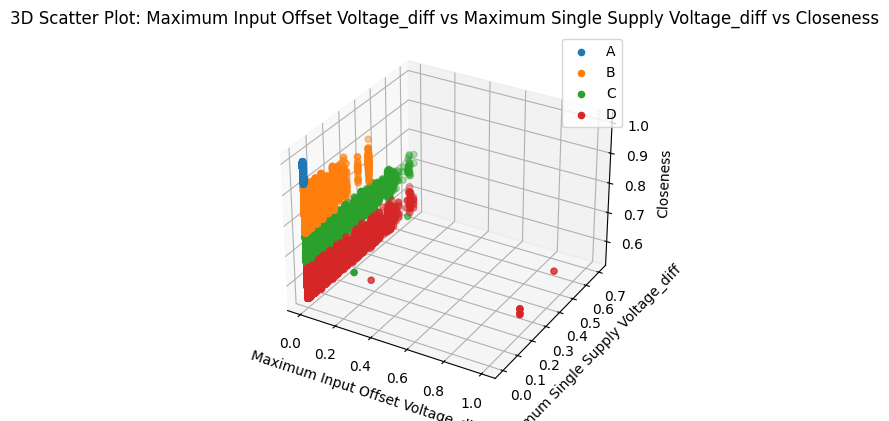

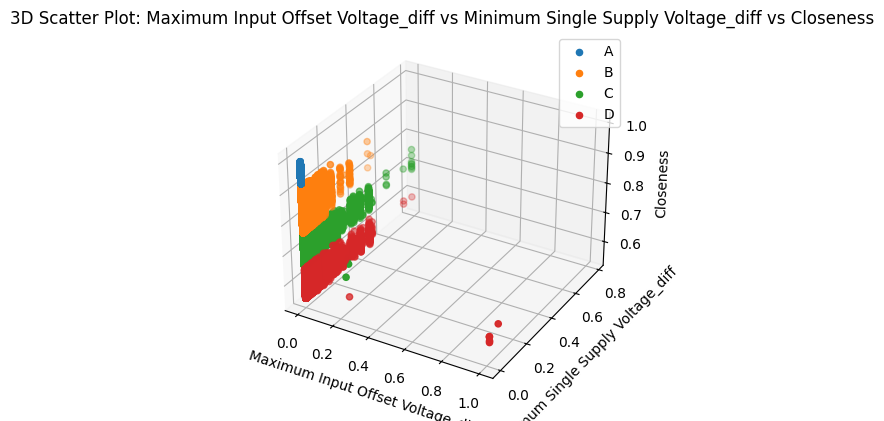

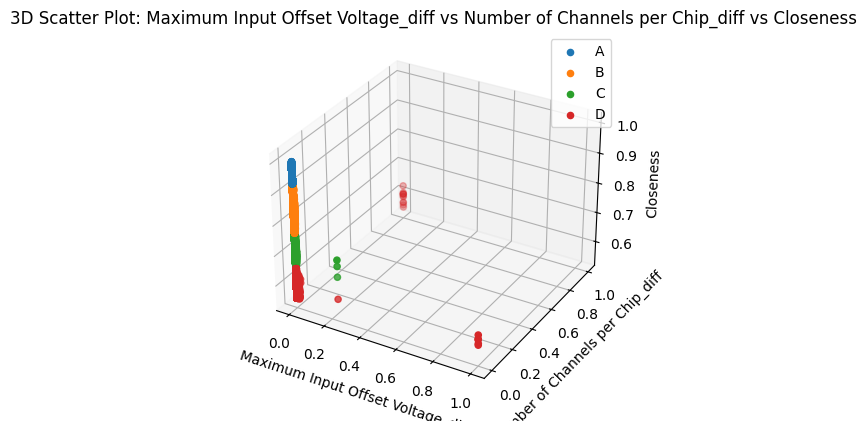

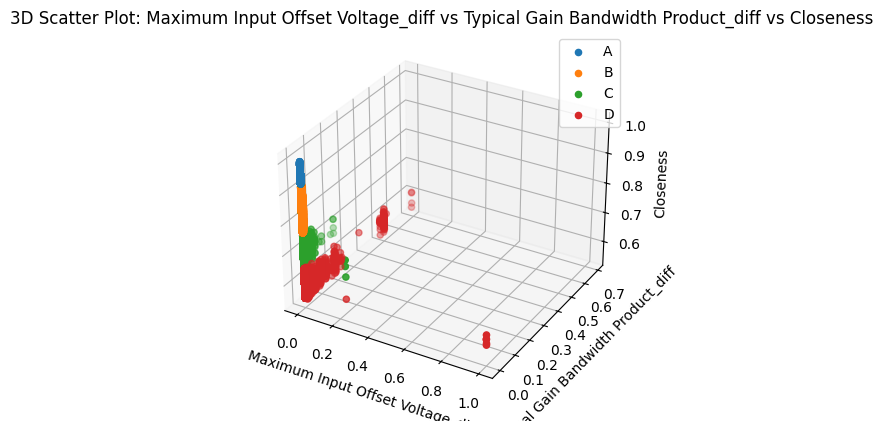

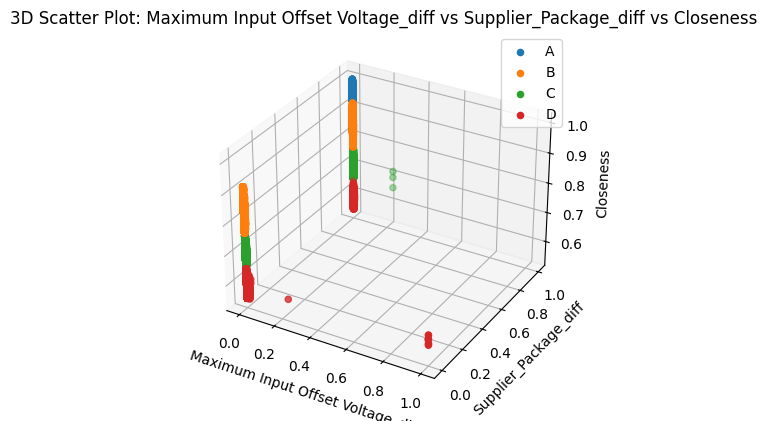

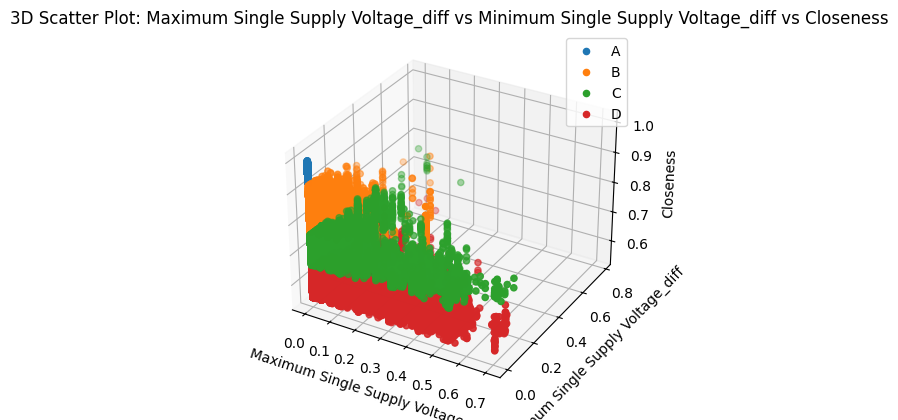

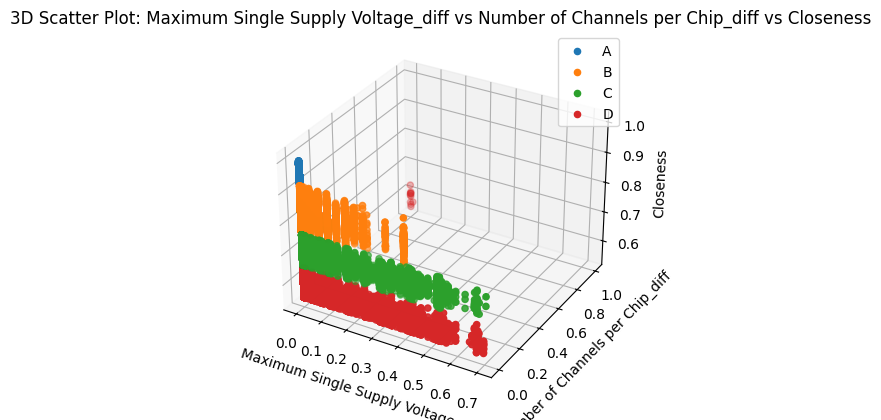

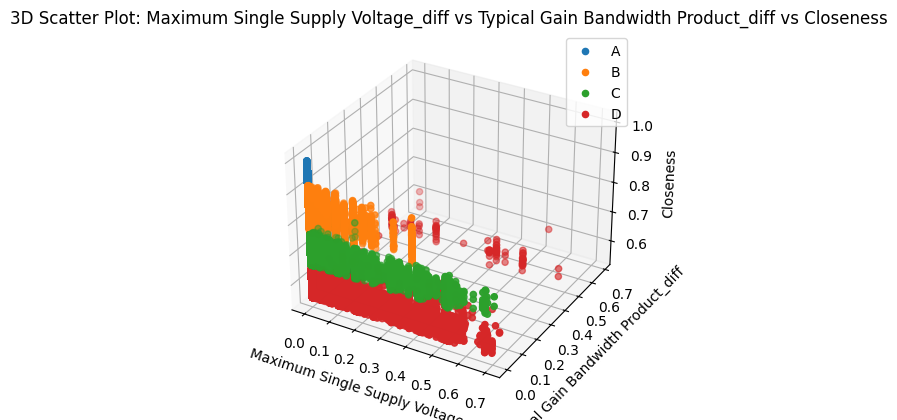

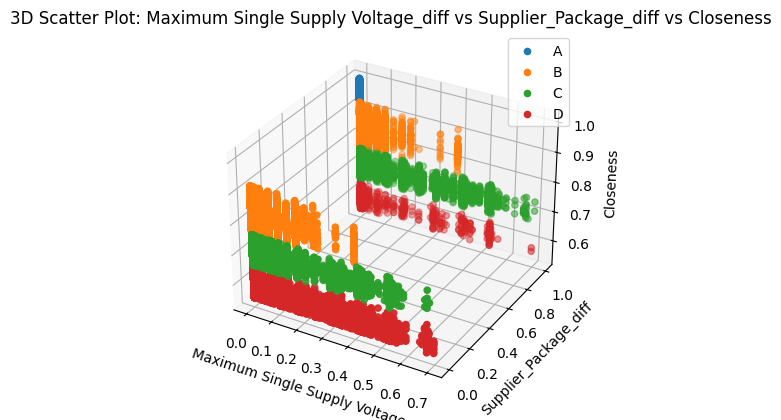

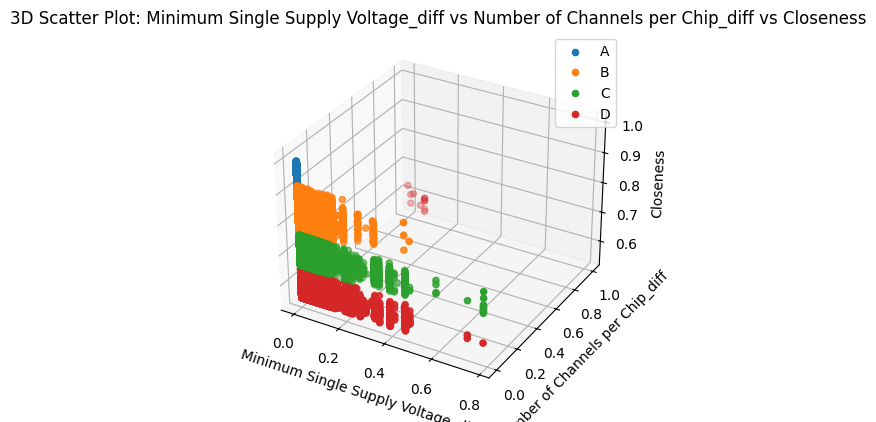

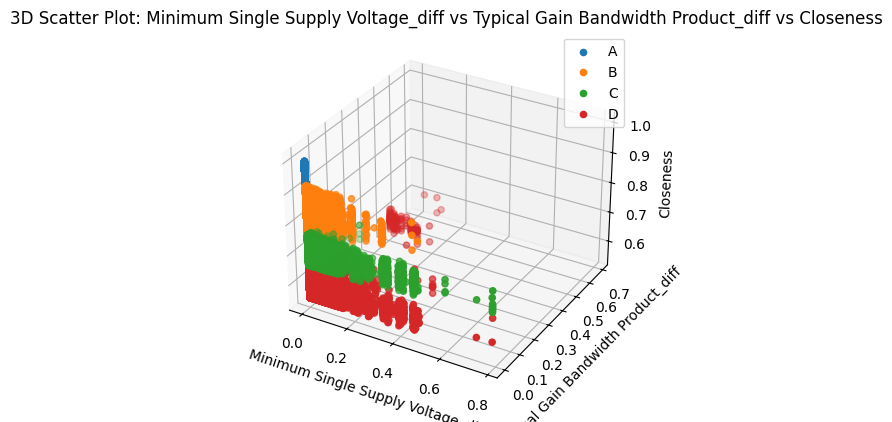

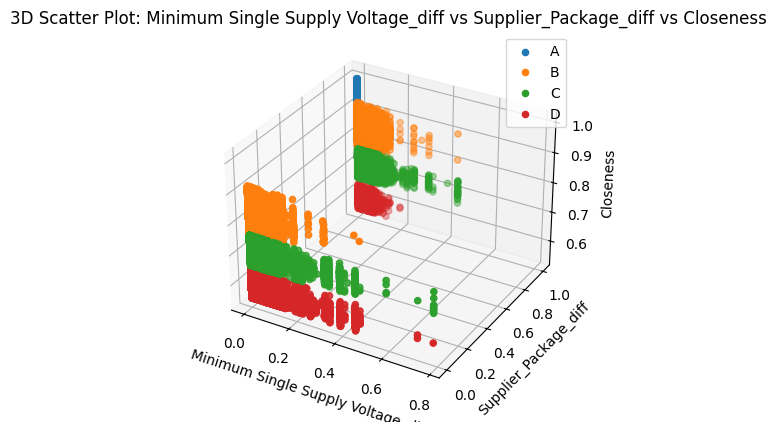

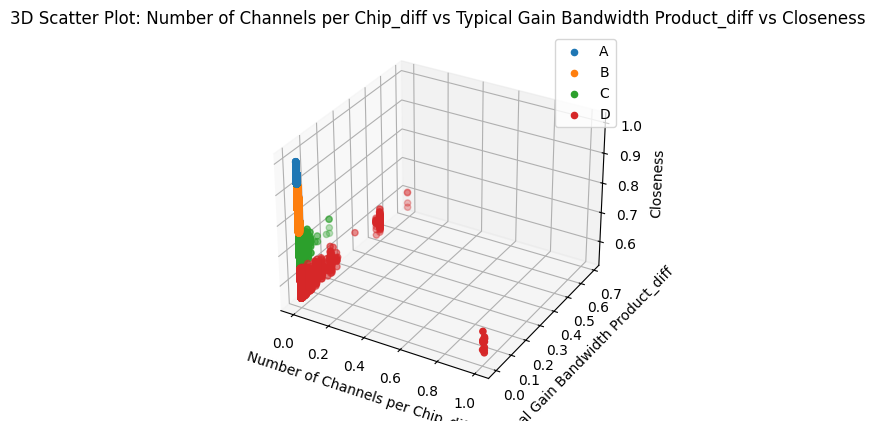

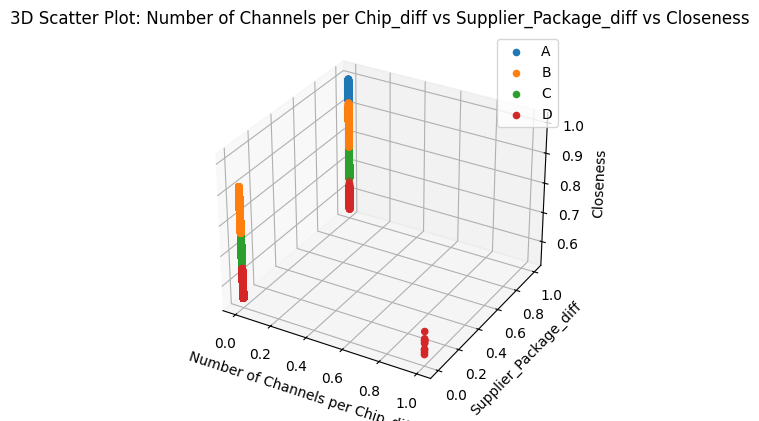

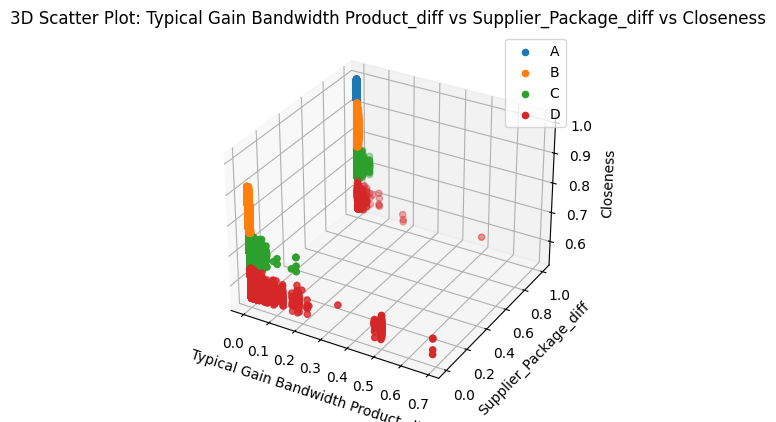

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import seaborn as sns

# Identify numerical columns excluding 'Closeness'

# Generate all possible pairs of numerical columns
column_pairs = list(itertools.combinations(columns_diff, 2))

# Generate a color palette based on 'Cross Reference Type'
unique_types = df_sampled['Cross Reference Type'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_types))
color_dict = dict(zip(unique_types, palette))

# Create 3D scatter plots for each pair
for x_col, y_col in column_pairs:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for ctype in unique_types:
        subset = df_sampled[df_sampled['Cross Reference Type'] == ctype]
        ax.scatter(
            subset[x_col],
            subset[y_col],
            subset['Closeness'],
            color=color_dict[ctype],
            label=ctype,
            marker='o'
        )
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel('Closeness')
    plt.title(f'3D Scatter Plot: {x_col} vs {y_col} vs Closeness')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Define target and features
X = df_sampled[columns_diff] # Replace 'Closeness' with your target column if different
y = df_sampled['Closeness']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Preprocessing for numerical data
# numerical_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, columns_diff),
#         ('cat', categorical_transformer, categorical_columns)
#     ])

# Create the pipeline
pipeline = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Define hyperparameter grid
param_grid = {#default 
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation R2 score:", grid_search.best_score_)

# Save the model
joblib.dump(grid_search.best_estimator_, 'random_forest_regressor_pipeline.pkl')

Best parameters: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best cross-validation R2 score: 0.8284001911231055


['random_forest_regressor_pipeline.pkl']

In [53]:
test = df_sampled.sample(n=30000,random_state=42)
test["predicted Closeness"]=grid_search.best_estimator_.predict(test[columns_diff])
test["error"]=np.abs(test["Closeness"]-test["predicted Closeness"])
test.head()

,Cross Reference Type,MPN,MANUFACTURER,Maximum Input Offset Voltage,Maximum Single Supply Voltage,Minimum Single Supply Voltage,Number of Channels per Chip,Supplier_Package,Typical Gain Bandwidth Product,MPN_comp,...,Std,Closeness,Maximum Input Offset Voltage_diff,Maximum Single Supply Voltage_diff,Minimum Single Supply Voltage_diff,Number of Channels per Chip_diff,Typical Gain Bandwidth Product_diff,Supplier_Package_diff,predicted Closeness,error
2102,B,PN-103477,MN-1030,0.001750,0.478261,0.153094,0.333333,SO N,0.000137,PN-103458,...,0.0249,0.829508,0.000000,0.104348,0.000000,0.0,0.000050,0,0.776994,0.052515
28239,B,PN-1017532,MN-1030,0.000750,0.060870,0.074919,0.000000,SOT-23,0.000082,PN-1014377,...,0.0249,0.833472,0.000125,0.008696,0.019544,0.0,0.000020,1,0.822038,0.011435
3,A,PN-1017594,MN-1030,0.000500,0.478261,0.153094,0.000000,SOT-23,0.000100,PN-1017598,...,0.0107,0.941775,0.000500,0.000000,0.000000,0.0,0.000000,1,0.959850,0.018075
8669,B,PN-1018060,MN-1030,0.001125,0.052174,0.120521,0.333333,MSOP,0.002500,PN-109086,...,0.0249,0.826799,0.000750,0.017391,0.013029,0.0,0.000625,0,0.787465,0.039334
26860,B,PN-103484,MN-1030,0.001750,0.478261,0.153094,0.333333,SO N,0.000137,PN-1018212,...,0.0249,0.838602,0.000500,0.034783,0.000000,0.0,0.005881,0,0.794886,0.043716


<Axes: xlabel='predicted Closeness', ylabel='Count'>

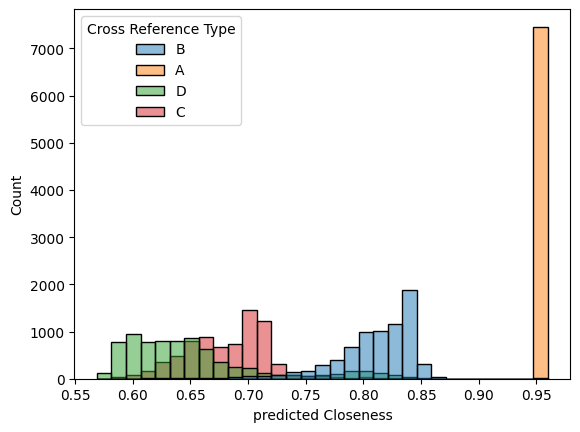

In [52]:
sns.histplot(test,x="predicted Closeness",hue="Cross Reference Type")


<Axes: xlabel='error'>

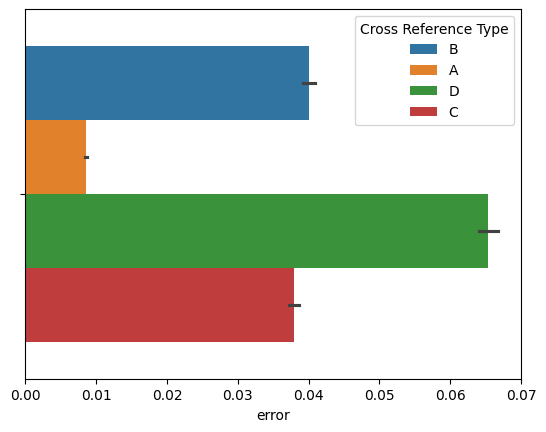

In [56]:
sns.barplot(test,x="error",hue="Cross Reference Type")


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Define target and features
X = df_sampled[columns_diff]  # Ensure columns_diff includes feature columns
y = df_sampled['Closeness']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns


# Preprocessing for numerical data
# numerical_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numer),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# Create the pipeline
pipeline = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Define hyperparameter grid
param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation R2 score:", grid_search.best_score_)

# Save the model
joblib.dump(grid_search.best_estimator_, 'svr_pipeline.pkl')

Best parameters: {'regressor__C': 10, 'regressor__epsilon': 0.1, 'regressor__kernel': 'rbf'}
Best cross-validation R2 score: 0.5456526065646987


['svr_pipeline.pkl']

In [65]:
test = df_sampled.sample(n=30000,random_state=42)
test["predicted Closeness"]=grid_search.best_estimator_.predict(test[columns_diff])
test["error"]=np.abs(test["Closeness"]-test["predicted Closeness"])
test.head()

,Cross Reference Type,MPN,MANUFACTURER,Maximum Input Offset Voltage,Maximum Single Supply Voltage,Minimum Single Supply Voltage,Number of Channels per Chip,Supplier_Package,Typical Gain Bandwidth Product,MPN_comp,...,Std,Closeness,Maximum Input Offset Voltage_diff,Maximum Single Supply Voltage_diff,Minimum Single Supply Voltage_diff,Number of Channels per Chip_diff,Typical Gain Bandwidth Product_diff,Supplier_Package_diff,predicted Closeness,error
2102,B,PN-103477,MN-1030,0.001750,0.478261,0.153094,0.333333,SO N,0.000137,PN-103458,...,0.0249,0.829508,0.000000,0.104348,0.000000,0.0,0.000050,0,0.719841,0.109667
28239,B,PN-1017532,MN-1030,0.000750,0.060870,0.074919,0.000000,SOT-23,0.000082,PN-1014377,...,0.0249,0.833472,0.000125,0.008696,0.019544,0.0,0.000020,1,0.811192,0.022280
3,A,PN-1017594,MN-1030,0.000500,0.478261,0.153094,0.000000,SOT-23,0.000100,PN-1017598,...,0.0107,0.941775,0.000500,0.000000,0.000000,0.0,0.000000,1,0.872416,0.069359
8669,B,PN-1018060,MN-1030,0.001125,0.052174,0.120521,0.333333,MSOP,0.002500,PN-109086,...,0.0249,0.826799,0.000750,0.017391,0.013029,0.0,0.000625,0,0.715679,0.111120
26860,B,PN-103484,MN-1030,0.001750,0.478261,0.153094,0.333333,SO N,0.000137,PN-1018212,...,0.0249,0.838602,0.000500,0.034783,0.000000,0.0,0.005881,0,0.714150,0.124452


<Axes: xlabel='predicted Closeness', ylabel='Count'>

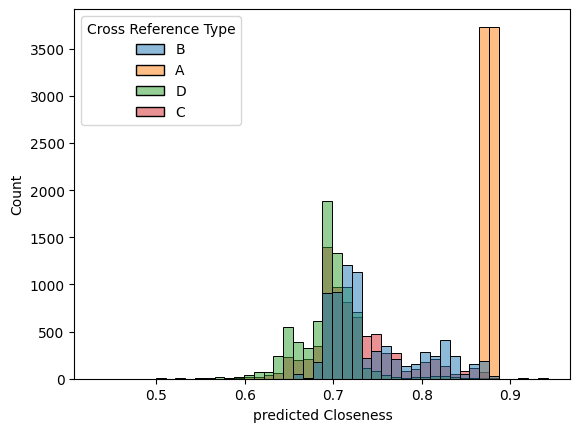

In [66]:
sns.histplot(test,x="predicted Closeness",hue="Cross Reference Type")


<Axes: xlabel='error'>

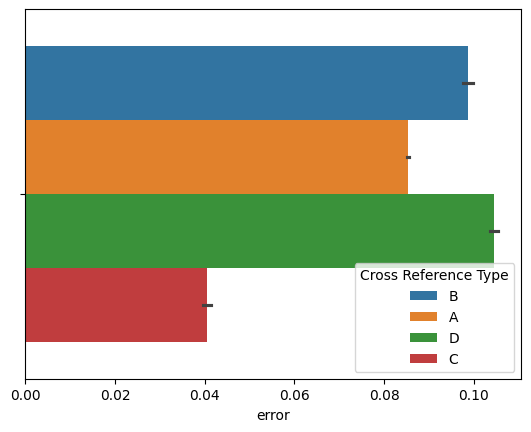

In [67]:
sns.barplot(test,x="error",hue="Cross Reference Type")

In [68]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

In [73]:
main_features = numerical_columns + categorical_columns
comp_features = [col + '_comp' for col in numerical_columns] + [col + '_comp' for col in categorical_columns]


In [77]:
df_sampled.columns

Index(['Cross Reference Type', 'MPN', 'MANUFACTURER',
       'Maximum Input Offset Voltage', 'Maximum Single Supply Voltage',
       'Minimum Single Supply Voltage', 'Number of Channels per Chip',
       'Supplier_Package', 'Typical Gain Bandwidth Product', 'MPN_comp',
       'MANUFACTURER_comp', 'Maximum Input Offset Voltage_comp',
       'Maximum Single Supply Voltage_comp',
       'Minimum Single Supply Voltage_comp',
       'Number of Channels per Chip_comp', 'Supplier_Package_comp',
       'Typical Gain Bandwidth Product_comp', 'Mean', 'Std', 'Closeness',
       'Maximum Input Offset Voltage_diff',
       'Maximum Single Supply Voltage_diff',
       'Minimum Single Supply Voltage_diff',
       'Number of Channels per Chip_diff',
       'Typical Gain Bandwidth Product_diff', 'Supplier_Package_diff'],
      dtype='object')

In [101]:
import torch

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Version: {torch.version.cuda}")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")

PyTorch Version: 2.2.2+cpu
CUDA Version: None
CUDA Available: False
